<div style="border:1px solid black; padding:10px; background-color: #F8F8F8;">
    <strong> <b>Notions et fonctions</b></strong><br>.
    <i> Les notions et procédures apparaissant pour la première fois dans le cours sont suivies d'un astérisque
    <ul>
       <li>Corrélation linéaire, Pearson</li>
        <li> Corrélation non linéaire Spearman</li>
    </ul>
    <strong> Comme d'habitude certaines cellules sont dépendantes de cellules précédentes. Il faut donc les éxécuter en suivant leur ordre dans la page</strong> 
</div>



## révisions
<ul>
    <li>Poursuivre en intégrant éléments contextes et biblio</li>
    
</ul>

# Liens entre variables quantitatives

<div style="text-align:justify;"> La plupart du temps nous ne souhaitons pas décrire une variable isolée mais explorer les liens (ou l'absence de) entre plusieurs variables. Les techniques statistiues permettant de le faire sont nombreuses. Nous en présentons quelques unes ci-dessous, qui s'appliquent dans le cas de liens entre variables quantitatives étudiées deux à deux. Les outils et techniques statistiques ont tous en effet un contexte d"emploi spécifique en dehors duquel les résultats produits ont peu de sens. </div>

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

Nous reprenons comme données le tableau décrivant les dépenses engagées pour les Ecoles Normales d'instituteurs à la fin du XIXe siècle. 

In [4]:

chemin_fichier = 'Doc5/data5.xlsx'  
df = pd.read_excel(chemin_fichier)

# Affichage des premières lignes du DataFrame pour vérification
print(df.head())


   DPT  ENGETA  EENGETA  Emprunt  ENGDPT  ENGVIL  TotalENG  CENFETA  EENFETA  \
0    1  170000        0   117175   15500       0    302675        0        0   
1    2  150000        0   200000  128913   40000    518913        0    60000   
2    3   60000    36000   220308   17000       0    333308    60000    78500   
3    4       0        0        0       0       0         0        0        0   
4    5       0     6584        0   10701       0     17285        0        0   

   EmpruntF  ENFDPT  ENFVIL  TotalENF  
0         0       0       0         0  
1         0  155905       0    215905  
2    179691       0       0    318191  
3         0       0       0         0  
4         0       0       0         0  


<div style="text-align:justify;"> Nous voulons écarter de l'analyse toutes les lignes qui portent la valeur 0 pour toute les colonnes. Soit cela signale qu'il n'existe pas d'écoles normales, soit que la donnée est manquante, dans les deux cas cela brouille la perception des liens éventuels entre les deux variables </div>

In [5]:
# Filtrer les lignes où la somme de TotalENG et TotalENF n'est pas égale à 0
df_f = df[(df['TotalENG'] + df['TotalENF']) != 0]

# Afficher le nouveau DataFrame pour vérifier
print(df_f)


    DPT  ENGETA  EENGETA  Emprunt  ENGDPT  ENGVIL  TotalENG  CENFETA  EENFETA  \
0     1  170000        0   117175   15500       0    302675        0        0   
1     2  150000        0   200000  128913   40000    518913        0    60000   
2     3   60000    36000   220308   17000       0    333308    60000    78500   
4     5       0     6584        0   10701       0     17285        0        0   
5     6       0    53300        0   62514       0    115815        0        0   
..  ...     ...      ...      ...     ...     ...       ...      ...      ...   
81   85       0        0        0   13963       0     13963        0        0   
82   86   24000     4000        0   35197       0     63197        0        0   
83   87       0    22303        0   16262       0     38566    75000        0   
84   88       0        0        0       0       0         0   109820        0   
86   90       0    20597        0       0       0     20597        0    20597   

    EmpruntF  ENFDPT  ENFVI

## Recherche de corrélations linéaires

**Coefficient de corrélation de Pearson (r)** :</br>
    - Le coefficient de corrélation de Pearson mesure la relation linéaire entre deux variables continues. Il est indiqué par la valeur du coefficient **\(r\)**, calculée à l'aide de la formule suivante :
   $$ [ r = \frac{{\sum_{i=1}^{n} (x_i - \bar{x})(y_i - \bar{y})}}{{\sqrt{{\sum_{i=1}^{n} (x_i - \bar{x})^2}} \cdot \sqrt{{\sum_{i=1}^{n} (y_i - \bar{y})^2}}}} ]$$
    où :
    - (x_i\) et (y_i\) sont les valeurs des deux variables pour chaque observation.
    - $$[(\bar{x})]$$ et $$[(\bar{y})]$$ sont les moyennes des valeurs des variables respectives.
  
Vous n'avez pas besoin d'être mathématicien ou statisticien pour comprendre ces formules, et leur compréhension aide à l'usage. Elles permettent à la lecture d'appréhender les opérations effectuées sur les données et donc leurs effets. Pour chaque point nous multiplions l'écart à la moyenne de sa valeur pour la variable x par l'écart à la moyenne pour la variable y, puis nous ajoutons ces produits. Si les deux écarts sont très souvent de même sens (si x et y varient d'une manière similaire) ou très souvent de sens contraire (l'une décroit quand l'autre croît), le produit sera grand et contribuera à établir la relation linéaire, si les écarts ne sont pas de même sens, leurs effets tendrons à s'annuler. 
Nous divisons ensuite cela par la racine carrée des sommes des carrés des déviation. Cela revient à normaliser le résultat pour que sa valeur absolue soit comprise entre 0 et 1 et que les corrélations soient comparables entre elles. 




<div style="text-align:justify;">Deux variables sont liées entre elles par une corrélation linéaire lorsque une relation affine peut être établie entre elles deux, c'est à dire qu'une équation de type Var1 = aXVar2 + b décrit assez bien la distribution. Graphiqument cela se traduit par le fait qu'il est possible d'approcher le nuage de points décrivant les positions des individus selon les deux variables par une droite. </br>
On mesure la robustesse de la relation à l'aide du coefficient de corrélation, dont le calcul est permis par de nombreuses bilbiothèque. </br>
Celui ci est compris entre -1 et 1, plus la valeur abspolue du coefficient est proche de 1, plus l'existence d'une corrélation linéaire est probable. En pratique il n'est guère utile de s'intéresser de près à des couples de variables pour lesquels cette valeur est inférieure à 0,75.
</div>

In [6]:
# Calcul de la matrice de corrélation
correlation_matrix = df_f[['ENGETA', 'EENGETA', 'Emprunt', 'ENGDPT', 'ENGVIL', 'CENFETA', 'EENFETA', 'ENFDPT', 'ENFVIL']].corr()

# Affichage de la matrice de corrélation
print(correlation_matrix)


           ENGETA   EENGETA   Emprunt    ENGDPT    ENGVIL   CENFETA   EENFETA  \
ENGETA   1.000000 -0.138370  0.906105 -0.007134  0.278852 -0.183967  0.420498   
EENGETA -0.138370  1.000000 -0.070788 -0.044149 -0.069514  0.243069  0.088813   
Emprunt  0.906105 -0.070788  1.000000 -0.062931  0.319881 -0.159064  0.521382   
ENGDPT  -0.007134 -0.044149 -0.062931  1.000000 -0.021576 -0.118552 -0.056426   
ENGVIL   0.278852 -0.069514  0.319881 -0.021576  1.000000 -0.043137  0.158790   
CENFETA -0.183967  0.243069 -0.159064 -0.118552 -0.043137  1.000000 -0.111201   
EENFETA  0.420498  0.088813  0.521382 -0.056426  0.158790 -0.111201  1.000000   
ENFDPT  -0.096089 -0.033816  0.016413 -0.016705 -0.001112  0.183053  0.006681   
ENFVIL  -0.098088  0.323190 -0.097518 -0.044982 -0.017770  0.387167 -0.076450   

           ENFDPT    ENFVIL  
ENGETA  -0.096089 -0.098088  
EENGETA -0.033816  0.323190  
Emprunt  0.016413 -0.097518  
ENGDPT  -0.016705 -0.044982  
ENGVIL  -0.001112 -0.017770  
CENFETA  

<div style="text-align:justify;">Il est possible de visualiser ces valeurs en utilisant une heatmap. La visualisation n'offre pas d'informations qui ne soit déjà dans le tableau de résultat, elle offre simplemnet une autre façon de les lire, plus rapide pour beaucoup d'entre nous.</div>

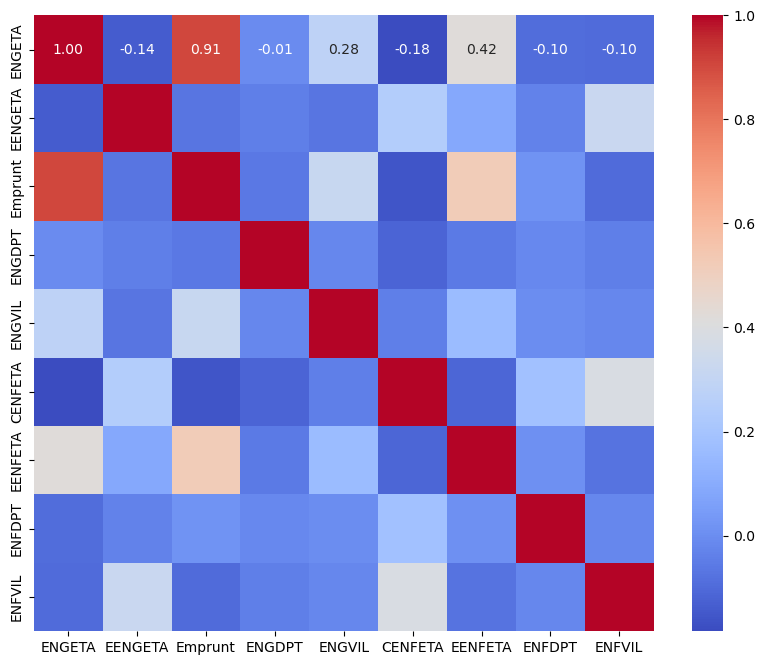

In [7]:

# Heatmap de la matrice de corrélation
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.show()


<div style="text-align:justify;">La seule corrélation forte ici décrit le fait que lorsque l'état a investi à l'occasion de la construction d'une Ecole Normale de Garçons, un emprunt a été contracté dont le montant est proportionnel à l'investissement consenti par l'état, ce qui ne semble pas appeler beaucoup de commentaires.</div>

## Corrélation non linéaire (Spearman)

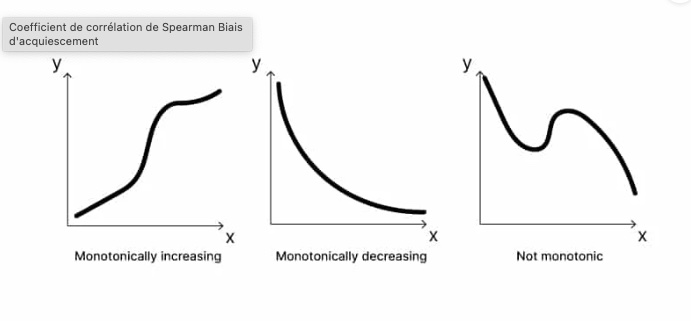

In [6]:
from IPython.display import Image
Image(filename='Doc5/monoton.jpg')
# Exemples de fonctins monotones

from IPython.display import display, HTML, Image

image_path = 'Doc5/monoton.jpg'

# Titre de l'image
image_title = "Exemples de fonctions monotones"

# Création du HTML pour le titre. Vous pouvez ajuster le style selon vos besoins.
title_html = f"<h3>{image_title}</h3>"

# Affichage du titre
display(HTML(title_html))

# Affichage de l'image
display(Image(filename=image_path))


<div style="text-align:justify;"> La corrélation de Spearman est une mesure non paramétrique de la corrélation de rang qui peut capturer des relations monotones, y compris les variations inverses. Contrairement à Pearson, Spearman n'exige pas que la relation entre les variables soit linéaire ni que les variables soient distribuées normalement.<br>
 Une relation monotone signifie que les variables se comportent de la même manière : lorsque l'une augmente, l'autre tend également à augmenter (corrélation positive) ou à diminuer (corrélation négative), mais d'une manière qui peut être non linéaire. <br>
Pour le dire de la manière la moins mathématique possible, un rang est attribué à chaque individu en fonction de la valeur prise par cet individu pour les des deux variables et l'on vérifie l'existence d'un lien entre les rangs (aux valeurs les plus hautes dans une variable corresponddent les valeurs les plus hautes dans l'autre variable ou inversement). Il s'agit ensutie de mesurer la force et le sens du lien entre le rang tenu par chaque individu dans chacune des deux distributions.<br>
L'usage des rangs plutôt que des valeurs fait que les valeurs extrèmes ou aberrantes pèsent peu, de même que la forme de la realtion entre les deux variables. <br>
Le coefficient de Spearman est adapté à l'étude des distributions qui ne suivent pas une loi normale ce qui le cas des variables que nous étudions ici <br>
Si quelque chose ne vous semble pas clair, ou si vous désirez une présentation mathématiquement rigoureuse d'un outil ou d'une technique n'hésitez pas à vous reporter aux pages wikipedia correspondantes (de préférence celles en anglais). Dans le domaine statitique (comme informatique) Wikipedia est une ressource très fiable et souvent très éclairante.
</div>


 </br>
<b>Coefficient de corrélation de Spearman (rs)</b></br></br>
    - Le coefficient de corrélation de Spearman mesure la relation de monotonie (ordre) entre deux variables à partir des rangs des données. Il varie également entre -1 et 1.</br>
    </br>
    $$[ rs = 1 - \frac{{6 \sum d_i^2}}{{n(n^2 - 1)}} ]$$
    où :
    - \(d_i\) est la différence entre les rangs des observations appariées.
    - \(n\) est le nombre d'observations.
</br></br>
<b></n>Test de corrélation de Spearman</b> :</br></br>
    - Le test de corrélation de Spearman permet de vérifier si la corrélation entre deux variables est significative.</br>
    - L'hypothèse nulle (\(H_0\)) est que les variables sont indépendantes (pas de corrélation).</br>
    - La statistique de test est basée sur le coefficient de corrélation de Spearman.</br>
    - Si la valeur p associée au test est inférieure au seuil de signification (généralement 0,05), on rejette \(H_0\) et conclut qu'il y a une corrélation significative.


In [17]:
# Calcul de la matrice de corrélation
correlation_matrix = df_f[['ENGETA', 'EENGETA', 'Emprunt', 'ENGDPT', 'ENGVIL', 'CENFETA', 'EENFETA', 'ENFDPT', 'ENFVIL']].corr()

# Affichage de la matrice de corrélation
print(correlation_matrix)


           ENGETA   EENGETA   Emprunt    ENGDPT    ENGVIL   CENFETA   EENFETA  \
ENGETA   1.000000 -0.138370  0.906105 -0.007134  0.278852 -0.183967  0.420498   
EENGETA -0.138370  1.000000 -0.070788 -0.044149 -0.069514  0.243069  0.088813   
Emprunt  0.906105 -0.070788  1.000000 -0.062931  0.319881 -0.159064  0.521382   
ENGDPT  -0.007134 -0.044149 -0.062931  1.000000 -0.021576 -0.118552 -0.056426   
ENGVIL   0.278852 -0.069514  0.319881 -0.021576  1.000000 -0.043137  0.158790   
CENFETA -0.183967  0.243069 -0.159064 -0.118552 -0.043137  1.000000 -0.111201   
EENFETA  0.420498  0.088813  0.521382 -0.056426  0.158790 -0.111201  1.000000   
ENFDPT  -0.096089 -0.033816  0.016413 -0.016705 -0.001112  0.183053  0.006681   
ENFVIL  -0.098088  0.323190 -0.097518 -0.044982 -0.017770  0.387167 -0.076450   

           ENFDPT    ENFVIL  
ENGETA  -0.096089 -0.098088  
EENGETA -0.033816  0.323190  
Emprunt  0.016413 -0.097518  
ENGDPT  -0.016705 -0.044982  
ENGVIL  -0.001112 -0.017770  
CENFETA  

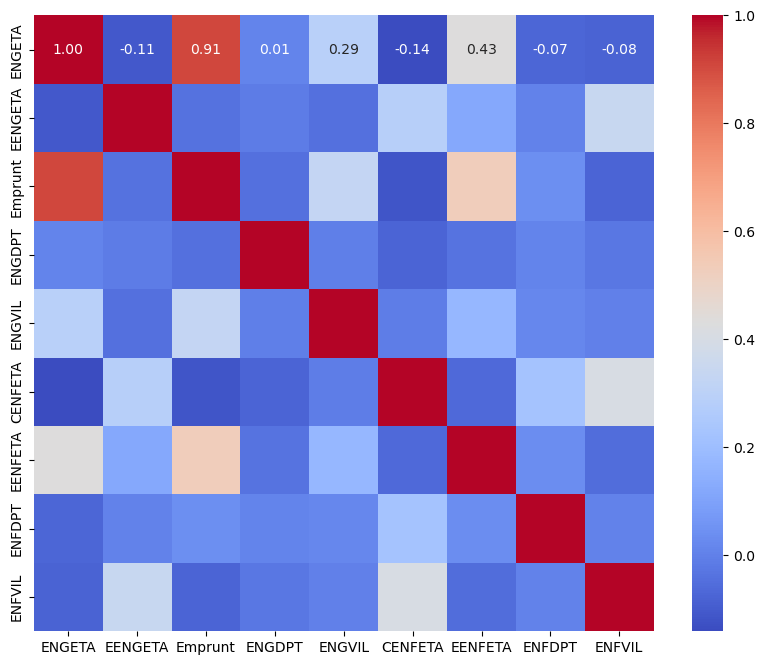

In [6]:


# Heatmap de la matrice de corrélation
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.show()

## Corrélation de Spearman

In [18]:
correlation_matrix_spearman = df_f[['ENGETA', 'EENGETA', 'Emprunt', 'ENGDPT', 'ENGVIL', 'CENFETA', 'EENFETA', 'ENFDPT', 'ENFVIL']].corr(method='spearman')
print(correlation_matrix_spearman)


           ENGETA   EENGETA   Emprunt    ENGDPT    ENGVIL   CENFETA   EENFETA  \
ENGETA   1.000000 -0.258123  0.585445  0.143982  0.242646 -0.123491  0.115587   
EENGETA -0.258123  1.000000 -0.013115  0.224073  0.041853  0.153357  0.189270   
Emprunt  0.585445 -0.013115  1.000000 -0.133064  0.289804 -0.070129  0.173722   
ENGDPT   0.143982  0.224073 -0.133064  1.000000 -0.010601 -0.059754 -0.059401   
ENGVIL   0.242646  0.041853  0.289804 -0.010601  1.000000  0.007641  0.043620   
CENFETA -0.123491  0.153357 -0.070129 -0.059754  0.007641  1.000000 -0.035156   
EENFETA  0.115587  0.189270  0.173722 -0.059401  0.043620 -0.035156  1.000000   
ENFDPT  -0.201484  0.039606 -0.187797  0.030668 -0.010147  0.382584  0.319852   
ENFVIL  -0.117292  0.233213 -0.046114 -0.090484  0.056120  0.552766 -0.061816   

           ENFDPT    ENFVIL  
ENGETA  -0.201484 -0.117292  
EENGETA  0.039606  0.233213  
Emprunt -0.187797 -0.046114  
ENGDPT   0.030668 -0.090484  
ENGVIL  -0.010147  0.056120  
CENFETA  

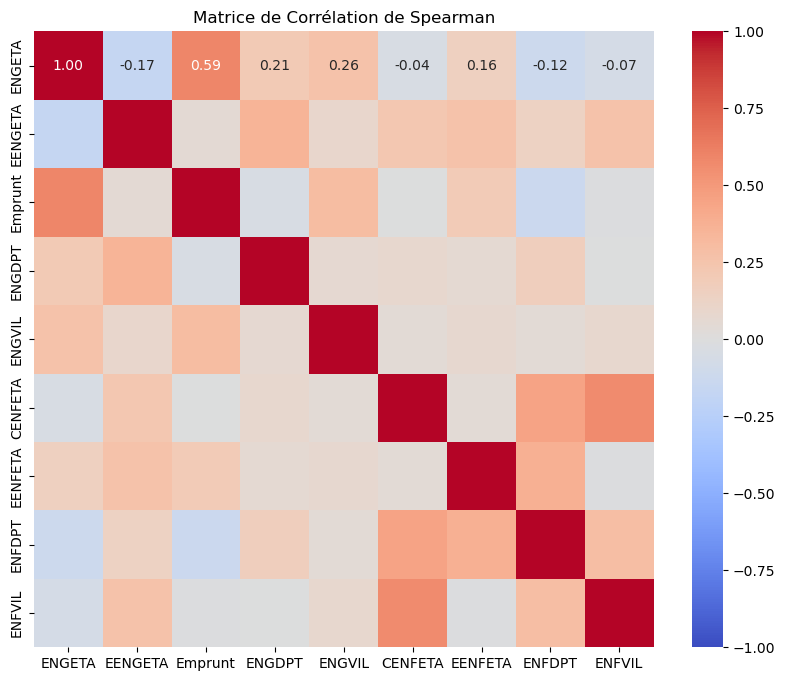

In [8]:

# Création de la heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_spearman, annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1)
plt.title("Matrice de Corrélation de Spearman")
plt.show()


<div style="text-align:justify;">L'interprétatation de la valeur du coeeficient de corrélaton de Sperman est plus délicate que celle d'un coeficient de corrélation linéaire. Sa signification est fortement dépendante du contexte des données et de la taille de la population étudiée.
Pour évaluer formellement si une corrélation de Spearman est statistiquement significative, vous pouvez effectuer un test de significativité, tel qu'un test de corrélation de Spearman. Ce test évalue si la corrélation observée diffère significativement de zéro (aucune corrélation). Le résultat du test vous donnera une valeur p, qui indique la probabilité d'observer une corrélation d'au moins cette magnitude si, en réalité, aucune relation n'existait entre les variables (hypothèse nulle).
Si la valeur p est inférieure à un seuil de significativité prédéfini (souvent 0,05 ou 0,01), vous pouvez rejeter l'hypothèse nulle et conclure que la corrélation est statistiquement significative, ce qui signifie qu'il est improbable d'observer une telle corrélation par hasard seul.
N'hésitez pas à vous reporter à la page wikipedia, en français, pour le coup très claire. 
</div>


In [19]:
from scipy.stats import spearmanr

# Supposons que x et y sont vos variables
x = df_f['ENGVIL']
y = df_f['ENGETA']

correlation, p_value = spearmanr(x, y)

print(f"Corrélation de Spearman: {correlation}, Valeur p: {p_value}")


Corrélation de Spearman: 0.24264635260829684, Valeur p: 0.038601458498926586


Avec une valeur de p <0.05 nous sommes dans une zone de significativité qui, dans le contexte des sciences sociales mérite de retenir l'attention. Il est possible qu'un lien complexe existe entre le montant des subventions d'état accordées durant la période pour la réparation ou l'achat d'une EN et le montant des dépenses assumées par la ville pour son Ecole Normale de garçon


In [26]:
from scipy.stats import spearmanr


x = df_f['ENGVIL']
y = df_f['EENGETA']

correlation, p_value = spearmanr(x, y)

print(f"Corrélation de Spearman: {correlation}, Valeur p: {p_value}")

Corrélation de Spearman: 0.04185251124015662, Valeur p: 0.725160599074657


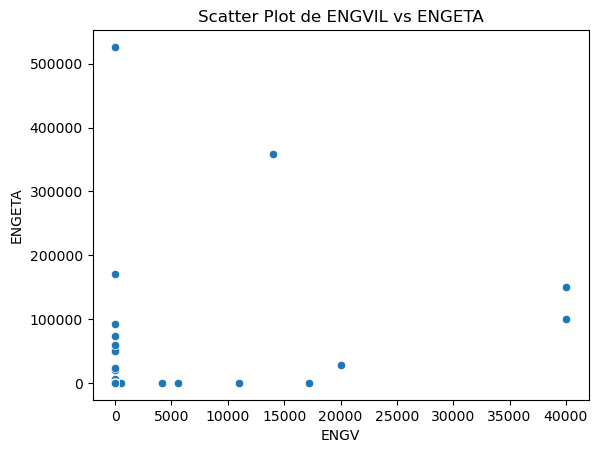

In [21]:


# Variables exemple : 'Variable1' et 'Variable2'
sns.scatterplot(x='ENGVIL', y='ENGETA', data=df)
plt.title('Scatter Plot de ENGVIL vs ENGETA')
plt.xlabel('ENGV')
plt.ylabel('ENGETA')
plt.show()


Je peux, pour plus de lisibilité, faire apparaître une courbe qui facilite la perception du lien entre les deux variables. Elle est définie de façon à être la plus proche possible du nuage de points obtenus en représentant les valeurs prises par les deux variables pour chaque individu. En ce contexte cette courbe est simplement une aide à la lecture et à l'intuition, nullement une confirmation ou une preuve. 

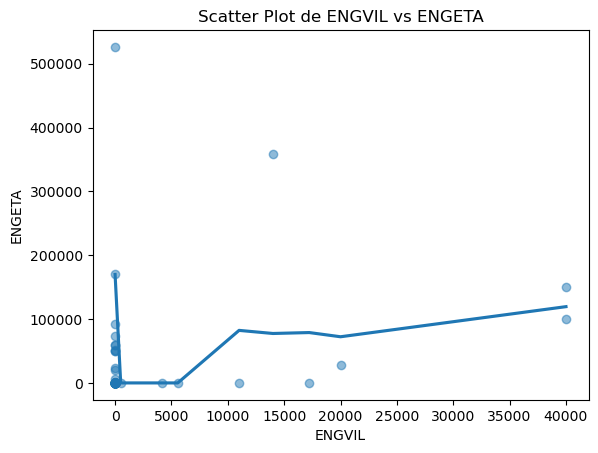

In [25]:
sns.regplot(x='ENGVIL', y='ENGETA', data=df, lowess=True, scatter_kws={'alpha': 0.5})
plt.title('Scatter Plot de ENGVIL vs ENGETA')
plt.xlabel('ENGVIL')
plt.ylabel('ENGETA')
plt.show()


In [29]:
from scipy.stats import spearmanr

# Supposons que x et y sont vos variables
x = df_f['CENFETA']
y = df_f['ENFVIL']

correlation, p_value = spearmanr(x, y)

print(f"Corrélation de Spearman: {correlation}, Valeur p: {p_value}")


Corrélation de Spearman: 0.5527663091884387, Valeur p: 3.961466726247805e-07


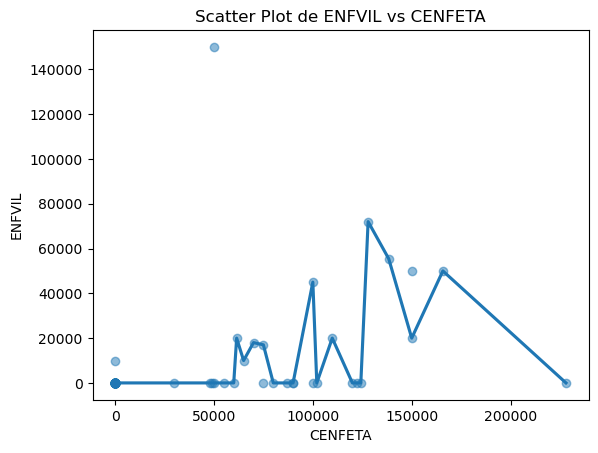

In [30]:
sns.regplot(x='CENFETA', y='ENFVIL', data=df, lowess=True, scatter_kws={'alpha': 0.5})
plt.title('Scatter Plot de ENFVIL vs CENFETA')
plt.xlabel('CENFETA')
plt.ylabel('ENFVIL')
plt.show()